In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
from glob import glob
from os.path import join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=False)
import json
from tqdm.notebook import tqdm

In [3]:
from ukbb2020_dataloader import UKBB2020

In [4]:
sys.path.insert(0, "../../helper/")
from plotGraphs import *

## create labels

In [5]:
dataset = UKBB2020()

total subjects in df: 40682


### Viz demographic distributions 
of training data

loaded following columns:
 {'31-0.0': 'Sex (s0.0)', '21003-2.0': 'Age when attended assessment centre', '21022-0.0': 'Age at recruitment (s0.0)', '54-2.0': 'UK Biobank assessment centre', '1707-0.0': 'Handedness (chirality/laterality) (s0.0)'}
skipping 10089/40682 subjects not belonging to train split


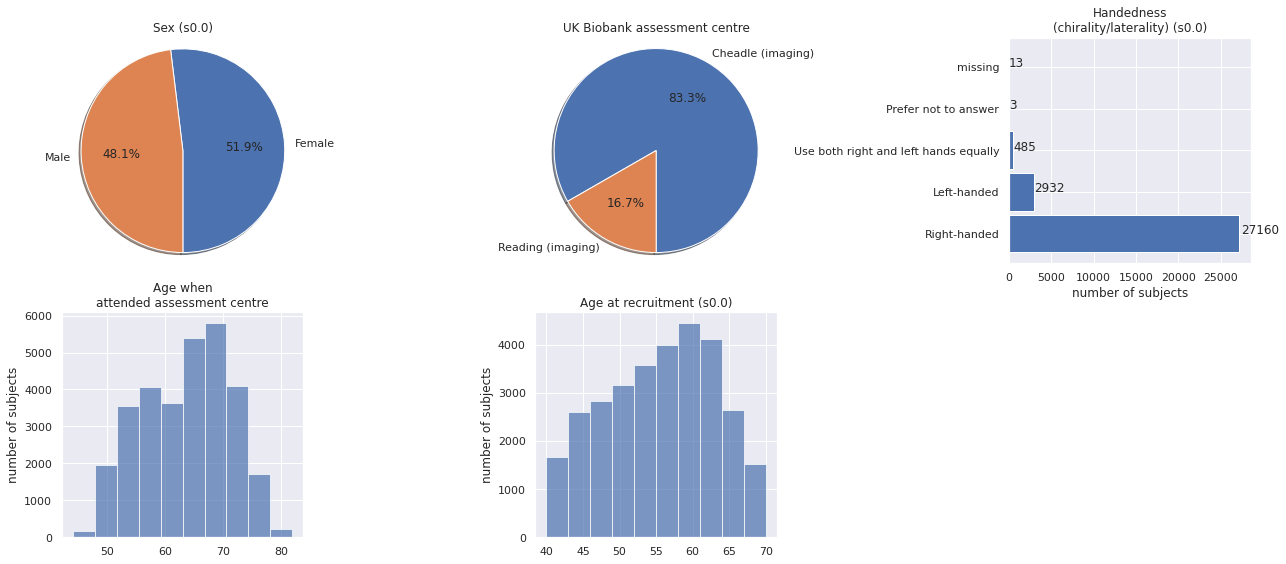

In [6]:
# %%time
df = dataset.get_metadata(predefined=['demographics'], cols=[], split='train')
dataset.plot_metadata(df)

### Viz alcohol use distributions
in the training data

In [7]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

#### Alcohol: [AUDIT](https://biobank.ndph.ox.ac.uk/ukb/label.cgi?id=142)
from thw **2016-17** online Mental health questionnaires  <br>

| Key | Description | Tags  | Tag-category |  Tag-name | 
| :---: | ----------- | ----- | --------- | --------|
| 20414 | Frequency of drinking alcohol | AUDIT-C | consumption | freq |
| 20403 | Amount of alcohol drunk on a typical day | AUDIT-C | consumption | amount |
| 20416 | Frequency of consuming 6 or more units of alcohol | AUDIT-C | consumption | binge |
| 20413 | Inability to cease alcohol | AUDIT-P  | dependence | loss_of_ctrl |
| 20407 | Failure to fulfill normal expectation due to alcohol | AUDIT-P | dependence | norm_func |
| 20412 | Frequency of morning alcohol | AUDIT-P | dependence | withdrawal |
| 20409 | Guilt due to drinking | AUDIT-P | harzardous | guilt |
| 20408 | Memory loss due to drinking alcohol | AUDIT-P | hazardous | memory_loss |
| 20411 | Injury due to alcohol | AUDIT-P | hazardous | harm |
| 20405 | Relative concerned due to alcohol usage | AUDIT-P | hazardous | asked_to_reduce |

There are 11 questions that are triggered in the following hierarchy:
- 20414	Frequency of drinking alcohol `freq` <br> 
`if (freq != 'Never') then`
    - 20403	Amount of alcohol drunk on a typical drinking day `amount` <br>
    - 20416	Frequency of consuming six or more units of alcohol `binge`<br> 
    `if (amount + binge >= 3) then`
        - 20413	Frequency of inability to cease drinking in last year `loss_of_ctrl` <br>
        - 20407	Frequency of failure to fulfil normal expectations due to drinking alcohol in last year  `normal_func` <br>
        - 20412	Frequency of needing morning drink of alcohol after heavy drinking session in last year  `withdrawal` <br>
        - 20409	Frequency of feeling guilt or remorse after drinking alcohol in last year `guilt` <br>
        - 20408	Frequency of memory loss due to drinking alcohol in last year `memory_loss`<br>
- 20411	Ever been injured or injured someone else through drinking alcohol `harm` <br>
- 20405	Ever had known person concerned about, or recommend reduction of, alcohol consumption `asked_to_reduce` <br>  `if (asked_to_reduce == Yes) then`
    - 20410	Age when known person last commented about drinking habits `asked_to_reduce_age` <br>

loaded following columns:
 {'20414-0.0': 'Frequency of drinking alcohol (s0.0)', '20403-0.0': 'Amount of alcohol drunk on a typical drinking day (s0.0)', '20416-0.0': 'Frequency of consuming six or more units of alcohol (s0.0)', '20413-0.0': 'Frequency of inability to cease drinking in last year (s0.0)', '20407-0.0': 'Frequency of failure to fulfil normal expectations due to drinking alcohol in last year (s0.0)', '20412-0.0': 'Frequency of needing morning drink of alcohol after heavy drinking session in last year (s0.0)', '20409-0.0': 'Frequency of feeling guilt or remorse after drinking alcohol in last year (s0.0)', '20408-0.0': 'Frequency of memory loss due to drinking alcohol in last year (s0.0)', '20411-0.0': 'Ever been injured or injured someone else through drinking alcohol (s0.0)', '20405-0.0': 'Ever had known person concerned about, or recommend reduction of, alcohol consumption (s0.0)'}
skipping 10089/40682 subjects not belonging to train split


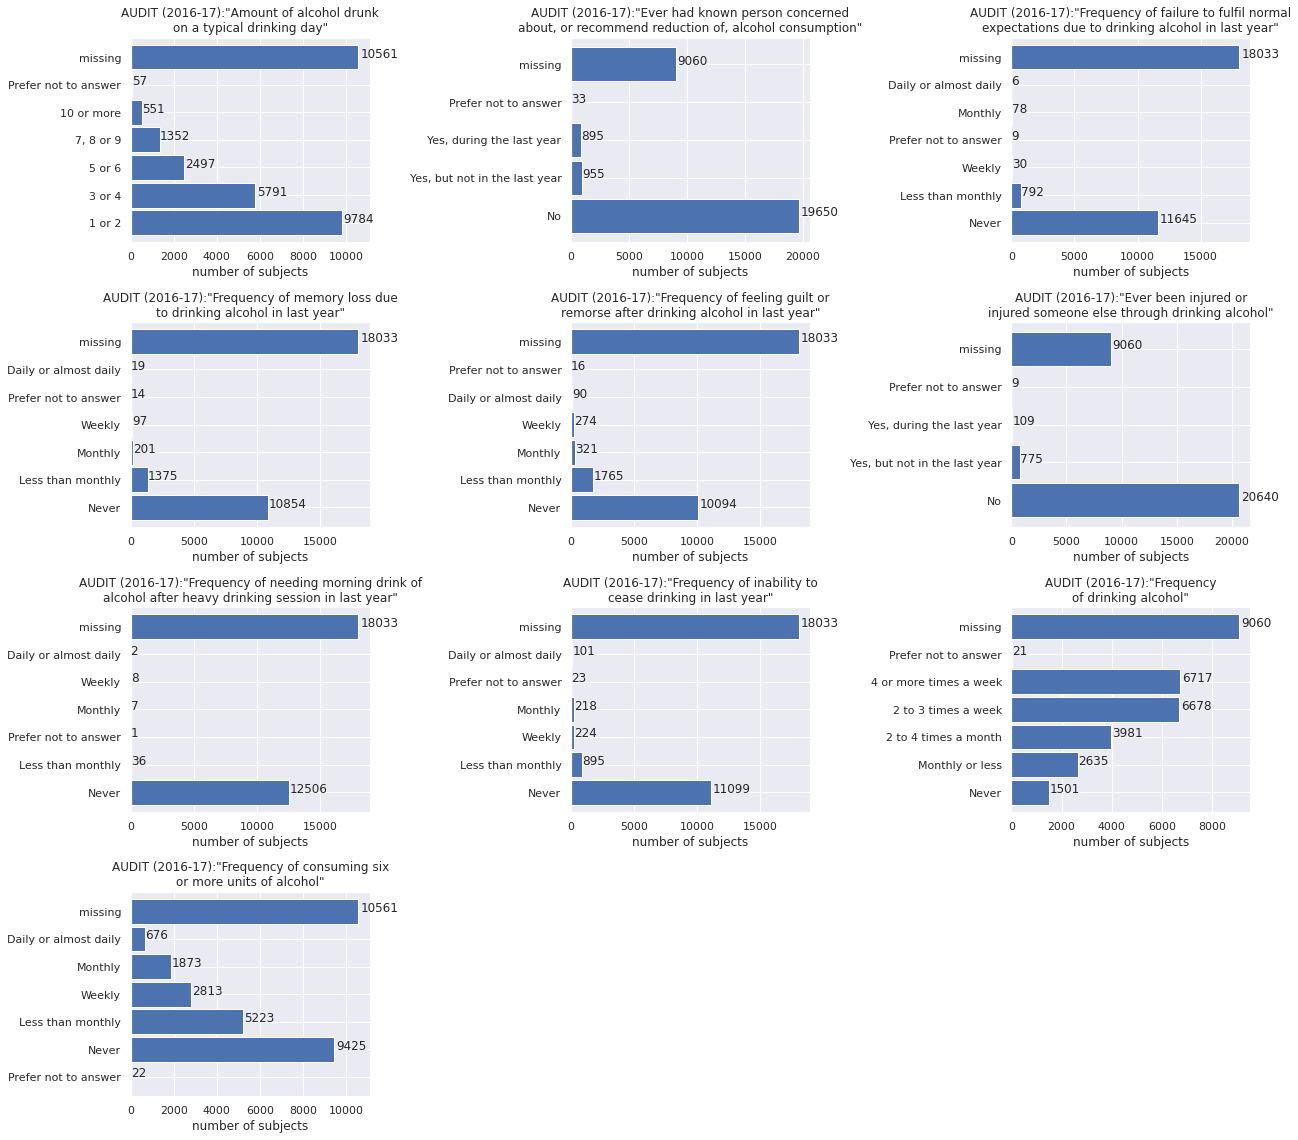

In [8]:
df = dataset.get_metadata(predefined=[], cols=["20414-0.0","20403-0.0","20416-0.0","20413-0.0",
                                               "20407-0.0","20412-0.0","20409-0.0","20408-0.0",
                                               "20411-0.0","20405-0.0",], split='train')

dataset.plot_metadata(df.rename(columns={c:'AUDIT (2016-17):"'+c.replace(' (s0.0)', '"') for c in df.columns})) 

#### Alcohol: [Lifestyle questions](https://biobank.ndph.ox.ac.uk/ukb/label.cgi?id=100051)
collected at 4 instances: We can use instance 2.0 collected during the imaging period i.e. 2014+  <br>

20117	Alcohol drinker status <br>
1558	Alcohol intake frequency <br>
3731	Former alcohol drinker <br>
<!-- 4407	Average monthly red wine intake <br>
4418	Average monthly champagne plus white wine intake <br>
4429	Average monthly beer plus cider intake <br>
4440	Average monthly spirits intake <br>
4451	Average monthly fortified wine intake <br>
4462	Average monthly intake of other alcoholic drinks <br> -->
<!-- 1568	Average weekly red wine intake <br>
1578	Average weekly champagne plus white wine intake <br>
1588	Average weekly beer plus cider intake <br>
1598	Average weekly spirits intake <br>
1608	Average weekly fortified wine intake <br>
5364	Average weekly intake of other alcoholic drinks <br> -->
1618	Alcohol usually taken with meals <br>
1628	Alcohol intake versus 10 years previously <br>
2664	Reason for reducing amount of alcohol drunk <br>
3859	Reason former drinker stopped drinking alcohol <br>

loaded following columns:
 {'20117-2.0': 'Alcohol drinker status', '1558-2.0': 'Alcohol intake frequency.', '3731-2.0': 'Former alcohol drinker', '1618-2.0': 'Alcohol usually taken with meals', '1628-2.0': 'Alcohol intake versus 10 years previously', '2664-2.0': 'Reason for reducing amount of alcohol drunk', '3859-2.0': 'Reason former drinker stopped drinking alcohol'}
skipping 10089/40682 subjects not belonging to train split


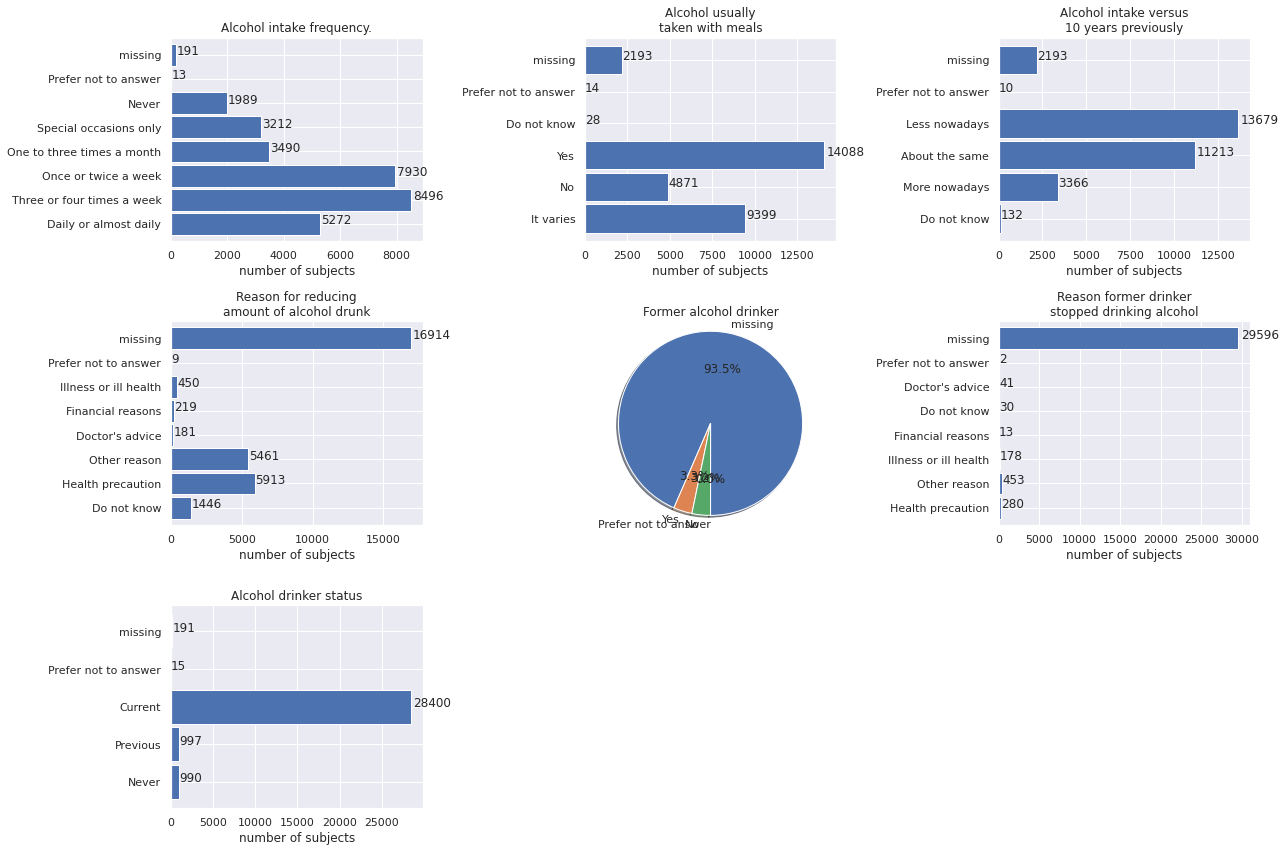

In [10]:
df = dataset.get_metadata(predefined=[], cols=["20117-2.0","1558-2.0","3731-2.0",
                                               # "4407-2.0","4418-2.0","4429-2.0","4440-2.0","4451-2.0","4462-2.0",
                                               # "1568-2.0","1578-2.0","1588-2.0","1598-2.0","1608-2.0","5364-2.0",
                                               "1618-2.0","1628-2.0","2664-2.0","3859-2.0"], split='train')
dataset.plot_metadata(df)

#### Alcohol: cross-questions consistencies
1. AUDIT Freq `20414-0.0` vs lifestyle freq question`1558-2.0`
2. Freq vs amount
3. Stop drinking vs age
4. ICD-AD vs AUDIT

In [11]:
dataset = UKBB2020()

total subjects in df: 40682


In [12]:
cols = ["1558-2.0", # Lifestyle - Freq
        "1628-2.0","2664-2.0","3859-2.0", # Lifestyle - prev. drinkers
        "20414-0.0","20403-0.0","20416-0.0",  # AUDIT
        '31-0.0', '21003-2.0' # demographic
        ]
df_main = dataset.get_metadata(predefined=[], cols=cols, split='train', rename_cols=False)

loaded following columns:
 {'1558-2.0': 'Alcohol intake frequency.', '1628-2.0': 'Alcohol intake versus 10 years previously', '2664-2.0': 'Reason for reducing amount of alcohol drunk', '3859-2.0': 'Reason former drinker stopped drinking alcohol', '20414-0.0': 'Frequency of drinking alcohol (s0.0)', '20403-0.0': 'Amount of alcohol drunk on a typical drinking day (s0.0)', '20416-0.0': 'Frequency of consuming six or more units of alcohol (s0.0)', '31-0.0': 'Sex (s0.0)', '21003-2.0': 'Age when attended assessment centre'}
skipping 10089/40682 subjects not belonging to train split


In [13]:
df_main_holdout = dataset.get_metadata(predefined=[], cols=cols, split='holdout', rename_cols=False)

loaded following columns:
 {'1558-2.0': 'Alcohol intake frequency.', '1628-2.0': 'Alcohol intake versus 10 years previously', '2664-2.0': 'Reason for reducing amount of alcohol drunk', '3859-2.0': 'Reason former drinker stopped drinking alcohol', '20414-0.0': 'Frequency of drinking alcohol (s0.0)', '20403-0.0': 'Amount of alcohol drunk on a typical drinking day (s0.0)', '20416-0.0': 'Frequency of consuming six or more units of alcohol (s0.0)', '31-0.0': 'Sex (s0.0)', '21003-2.0': 'Age when attended assessment centre'}
skipping 30593/40682 subjects not belonging to holdout split


In [14]:
df = df_main.copy()
df_holdout = df_main_holdout.copy()

df = df.rename(columns= {'1558-2.0': 'freq', 
                         '1628-2.0': 'Alcohol intake versus 10 years previously', 
                         '2664-2.0': 'Reason for reducing amount of alcohol drunk', 
                         '3859-2.0': 'Reason former drinker stopped drinking alcohol', 
                         '20414-0.0': 'freqaudit', 
                         '20403-0.0': 'amtaudit', 
                         '20416-0.0': 'bingeaudit', 
                         '31-0.0': 'Sex', 
                         '21003-2.0': 'Age'})

alc_cols = ['freq', 'freqaudit', 'amtaudit', 'bingeaudit']

In [15]:
# change the dtype to float
for c in df.columns:
    if df[c].dtype.name == 'category':
        for cat in df[c].cat.categories:
            # give invalid categories the same value (-1.0)
            if float(cat) < 0.0:
                df[c]= df[c].replace(cat, np.NaN)
    
    df[c] = df[c].astype(float)

Apply the AUDIT skip rules to 'amtaudit' and 'bingeaudit'

In [16]:
# apply the AUDIT skip rules to 'amtaudit' and 'bingeaudit'
df.loc[df['freqaudit']==0, 'amtaudit'] = 1.0
df.loc[df['freqaudit']==0, 'bingeaudit'] = 1.0

In [17]:
# sns.pairplot(df, vars=alc_cols, hue='Sex',  
#              kind='reg', corner=True, #diag_kind='hist',
#              plot_kws={'x_jitter':0.45,'y_jitter':0.45, 'line_kws':{'color':'k'}, 'scatter_kws':{'alpha':0.05}}) #'scatter', 'kde', 'hist', 'reg'}
# plt.show()

Compute a custom `highalc` variable

In [18]:
def get_alc_lvl(row):
    # row = row.fillna(0)
    if (row['freq']<=3 and (row['amtaudit']+row['bingeaudit'])>=4):
        return 2 #True
    elif row[['freq', 'freqaudit']].isna().any() or ( # also exclude very high value in any of the variables
        row['amtaudit']>3 or row['bingeaudit']>3 or row['freq']<=1): # (row['freq']<=3 and (row['amtaudit']+row['bingeaudit'])<3) or 
        return 1 #np.NaN
    else:
        return 0 #False
        
df['highalc'] = df.apply(lambda row: get_alc_lvl(row), axis=1)

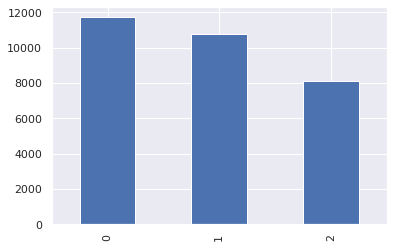

In [19]:
df['highalc'].value_counts(dropna=False).sort_index().plot.bar()
plt.show()

In [20]:
# sns.pairplot(df, vars=alc_cols, hue='highalc',  
#              kind='reg', corner=True, 
#              diag_kws={'alpha':0.8},
#              plot_kws={'x_jitter':0.45,'y_jitter':0.45, 'line_kws':{'color':'grey'}, 'scatter_kws':{'alpha':0.05}}) #'scatter', 'kde', 'hist', 'reg'}
# plt.show()

### Generate h5 file with full brain

In [21]:
dataset = UKBB2020()

total subjects in df: 40682


In [22]:
dataset.add_var_to_h5(df, 'highalc',    typ='lbl', binarize=True, class0=0, class1=2, viz=False)
dataset.add_var_to_h5(df, 'bingeaudit', typ='lbl', binarize=True, class0=1, class1=3, viz=False)
dataset.add_var_to_h5(df, 'freq', y_colname='alcfreq', typ='lbl', norm=True, viz=False)
dataset.add_var_to_h5(df, 'Sex', typ='conf', viz=False)
dataset.add_var_to_h5(df, 'Age', typ='conf', viz=False)
# dataset.add_var_to_h5(df, 'ageXsex', typ='conf', viz=False)

,highalc,bingeaudit,alcfreq,sex,age
subjectID,,,,,
1000014,NaN,NaN,0.2,0.0,61.0
1000023,0.0,NaN,0.2,1.0,66.0
1000030,0.0,0.0,1.0,0.0,65.0
1000041,NaN,NaN,NaN,NaN,NaN
1000059,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
5824877,NaN,NaN,0.4,1.0,81.0
5838702,1.0,NaN,0.2,0.0,66.0
5846234,0.0,0.0,1.0,0.0,57.0


In [23]:
print(len(dataset.df_h5.dropna()), dataset.all_labels, dataset.all_confs)

15010 ['highalc', 'bingeaudit', 'alcfreq'] ['sex', 'age']


In [17]:
# dataset.df_h5 = dataset.df_h5.sample(50)

In [18]:
dataset.prepare_X(mri_col='path_T1_MNI')

n=37 after dropping subjects with NaN


In [20]:
dataset.df_h5

,sex,T1MNI
subjectID,,
1214435,1.0,sub-1214435/ses-2/anat/sub-1214435_ses-2_T1_br...
1146092,1.0,sub-1146092/ses-2/anat/sub-1146092_ses-2_T1_br...
1094309,0.0,sub-1094309/ses-2/anat/sub-1094309_ses-2_T1_br...
1425802,1.0,sub-1425802/ses-2/anat/sub-1425802_ses-2_T1_br...
1084685,0.0,sub-1084685/ses-2/anat/sub-1084685_ses-2_T1_br...
1238592,0.0,sub-1238592/ses-2/anat/sub-1238592_ses-2_T1_br...
1206319,0.0,sub-1206319/ses-2/anat/sub-1206319_ses-2_T1_br...
1184689,0.0,sub-1184689/ses-2/anat/sub-1184689_ses-2_T1_br...
1379805,1.0,sub-1379805/ses-2/anat/sub-1379805_ses-2_T1_br...


In [21]:
%%time
dataset.save_h5("dummy", mri_kwargs={'z_factor':0.525})

saving h5 file at /ritter/share/data/UKBB_2020/BIDS/../h5files/dummy-t1mniz2-l-sexl0u1-n37.h5
Extracting 37 images into a single matrix..


  0%|          | 0/37 [00:00<?, ?it/s]

Finished loading MRIs into a data matrix of 155.49 mb
Writing into h5 file:
writing X of shape (37, 96, 114, 96)..
Writing 1 labels and 0 confounds..
Setting attributes
Finished writing h5.
CPU times: user 58.2 s, sys: 4.17 s, total: 1min 2s
Wall time: 1min 13s


Check the h5 file

______________________________________________________________________________________
filename: dummy-t1mniz2-l-sexl0u1-n37.h5 
 h5.columns = ['X', 'i', 'sex'] 
 h5.attrs = ['X_col_names', 'confs', 'labels']
n = 37 	 label = sex 	 X.shape = (37, 96, 114, 96)  	 confs = []
label and conf with distributions:
'AxesSubplot' object is not subscriptable

subject: 1121864 	 (min=-393.44, mean=225.77, max=1995.65) 	 X[0,0,0]=0.0


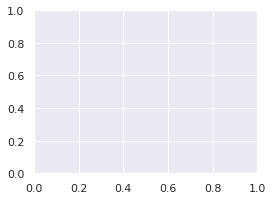

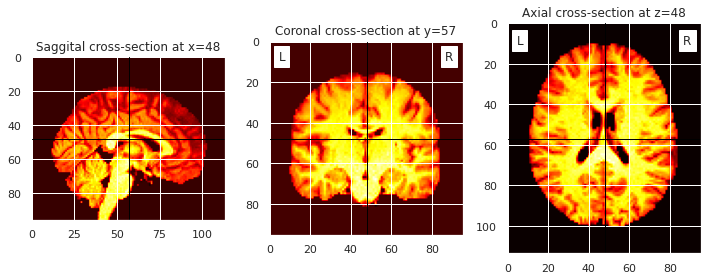

In [23]:
sys.path.insert(0,"../ML_for_alcohol_misuse/helper")
from dataloader_utils import show_h5_contents

show_h5_contents(
    ["/ritter/share/data/UKBB_2020/h5files/dummy*.h5"],
    X_brain_voxels=True)

In [181]:
# import h5py as h5
# f = h5.File("/ritter/share/data/UKBB_2020/h5files/t1mniz2-l-highalcl0u2-bingeauditl1u3-alcfreq-c-sex-age-n14617.h5", 'r')
# cols = list(f.keys())
# cols

['X', 'age', 'alcfreq', 'bingeaudit', 'highalc', 'i', 'sex']

In [151]:
! ls /ritter/share/data/UKBB_2020/h5files/

holdout-t1mniz2-l-highalcl0u2-bingeauditl1u3-alcfreq-c-sex-age-n4505.h5
t1mniz2-l-highalcl0u2-bingeauditl1u3-alcfreq-c-sex-age-n14617.h5


### Generate h5 file with IDPs

In [144]:
# load a df with all T1 and DTI IDPs
df_idps = pd.read_csv('/ritter/share/data/UKBB_2020/tables/sourceData_customIDPs_40682.csv', index_col='eid')
colnames_map = UKBB2020()._get_metadata_desc(df_idps.columns)[0]
df_idps = df_idps.rename(columns=colnames_map)
df_idps

total subjects in df: 40682


,Volumetric scaling from T1 head image to standard space,Volume of peripheral cortical grey matter (normalised for head size),Volume of peripheral cortical grey matter,Volume of ventricular cerebrospinal fluid (normalised for head size),Volume of ventricular cerebrospinal fluid,Volume of grey matter (normalised for head size),Volume of grey matter,Volume of white matter (normalised for head size),Volume of white matter,"Volume of brain, grey+white matter (normalised for head size)",...,Volume of S-parieto-occipital (right hemisphere),Volume of S-pericallosal (right hemisphere),Volume of S-postcentral (right hemisphere),Volume of S-precentral-inf-part (right hemisphere),Volume of S-precentral-sup-part (right hemisphere),Volume of S-suborbital (right hemisphere),Volume of S-subparietal (right hemisphere),Volume of S-temporal-inf (right hemisphere),Volume of S-temporal-sup (right hemisphere),Volume of S-temporal-transverse (right hemisphere)
eid,,,,,,,,,,,,,,,,,,,,,
1000014,1.31325,573119.0,436414.0,59635.2,45410.4,743358.0,566045.0,674595.0,513684.0,1417950.0,...,2287.0,1318.0,3737.0,2984.0,2723.0,343.0,1382.0,2442.0,9376.0,313.0
1000023,1.35351,642702.0,474841.0,50654.4,37424.5,792537.0,585543.0,740646.0,547205.0,1533180.0,...,3138.0,1318.0,3069.0,2312.0,2096.0,374.0,1797.0,2157.0,9644.0,311.0
1000030,1.34229,545411.0,406329.0,77965.2,58083.7,728330.0,542603.0,692892.0,516202.0,1421220.0,...,3441.0,1061.0,4267.0,2134.0,2126.0,826.0,1982.0,1930.0,9239.0,477.0
1000041,1.25484,561033.0,447094.0,26729.4,21300.9,736702.0,587086.0,699139.0,557152.0,1435840.0,...,3228.0,1155.0,3406.0,2332.0,2744.0,742.0,1691.0,2321.0,10716.0,433.0
1000059,1.28669,602284.0,468088.0,48296.6,37535.6,787914.0,612357.0,647788.0,503453.0,1435700.0,...,3107.0,1012.0,3161.0,3793.0,1887.0,769.0,2284.0,1715.0,8646.0,436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824877,1.18709,602660.0,507677.0,74954.7,63141.4,773422.0,651526.0,730200.0,615116.0,1503620.0,...,3790.0,1289.0,3389.0,2405.0,2198.0,549.0,1882.0,2085.0,11491.0,383.0
5838702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3476.0,927.0,3532.0,2446.0,1772.0,747.0,1768.0,1636.0,9650.0,470.0
5846234,1.57683,657531.0,416996.0,20464.6,12978.4,821885.0,521227.0,734744.0,465963.0,1556630.0,...,2068.0,1213.0,2821.0,1876.0,1712.0,332.0,1231.0,1912.0,7361.0,407.0


In [75]:
dataset = UKBB2020()
dataset.add_var_to_h5(df, 'highalc',    typ='lbl', binarize=True, class0=0, class1=2, viz=False)
dataset.add_var_to_h5(df, 'bingeaudit', typ='lbl', binarize=True, class0=1, class1=3, viz=False)
dataset.add_var_to_h5(df, 'freq', y_colname='alcfreq', typ='lbl', norm=True, viz=False)
dataset.add_var_to_h5(df, 'Sex', typ='conf', viz=False)
dataset.add_var_to_h5(df, 'Age', typ='conf', viz=False)
# save a copy of this for reuse
df_h5_all = dataset.df_h5.copy()
df_h5_all

total subjects in df: 40682


,highalc,bingeaudit,alcfreq,sex,age
subjectID,,,,,
1000014,NaN,NaN,0.2,0.0,61.0
1000023,0.0,NaN,0.2,1.0,66.0
1000030,0.0,0.0,1.0,0.0,65.0
1000041,NaN,NaN,NaN,NaN,NaN
1000059,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
5824877,NaN,NaN,0.4,1.0,81.0
5838702,1.0,NaN,0.2,0.0,66.0
5846234,0.0,0.0,1.0,0.0,57.0


In [76]:
# # change age values to categories for confound control
# dataset.df_h5['age'].plot(kind='hist', bins=15)
# plt.show()

# def remap_age(age):
#     # return int((age-50) // 10)
#     if age<55:
#         return 0
#     elif age<65:
#         return 1
#     elif age<72:
#         return 2
#     else:
#         return 3
    
# dataset.df_h5['age'].apply(remap_age).value_counts().sort_index().plot(kind='bar')
# plt.show()

In [77]:
# select only subset of subject IDs that have all of these variables and generate one h5 file each with this subset
sub_ids = dataset.df_h5.dropna().index

In [148]:
# 1) highalc
dataset = UKBB2020()
dataset.add_var_to_h5(df, 'highalc', typ='lbl', binarize=True, class0=0, class1=2, viz=False)
dataset.add_var_to_h5(df, 'Sex', typ='conf', viz=False)
dataset.add_var_to_h5(df, 'Age', typ='conf', viz=False)
dataset.df_h5 = dataset.df_h5.loc[sub_ids]
dataset.prepare_X(preloaded_X=df_idps)
dataset.save_h5()

total subjects in df: 40682
n=13465 after dropping subjects with NaN
hdf5 file already exists at /ritter/share/data/UKBB_2020/BIDS/../h5files/idps-l-highalcl0u2-c-sex-age-n13465.h5. First delete it manually.


In [149]:
# 2) binge
dataset = UKBB2020()
dataset.add_var_to_h5(df, 'bingeaudit', typ='lbl', binarize=True, class0=1, class1=3, viz=False)
dataset.add_var_to_h5(df, 'Sex', typ='conf', viz=False)
dataset.add_var_to_h5(df, 'Age', typ='conf', viz=False)
dataset.df_h5 = dataset.df_h5.loc[sub_ids]
dataset.prepare_X(preloaded_X=df_idps)
dataset.save_h5()

total subjects in df: 40682
n=13465 after dropping subjects with NaN
saving h5 file at /ritter/share/data/UKBB_2020/BIDS/../h5files/idps-l-bingeauditl1u3-c-sex-age-n13465.h5
Writing into h5 file:
writing X of shape (13465, 2521)..
Writing 1 labels and 2 confounds..
Setting attributes
Finished writing h5.
